# House sales regression challenge

### Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Open data

In [2]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv')
df_sales.info() # Vérification des NaN (4 pour la colonne Price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Exploration des data 

In [0]:
colNames = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [4]:
df_corr = df_sales[colNames].corr()
df_corr['price']  # Matrice des corrélations pour trouver les variables corrélées avec le prix

price            1.000000
bedrooms         0.308330
bathrooms        0.525168
sqft_living      0.702040
sqft_lot         0.089639
floors           0.256894
waterfront       0.266367
view             0.397280
condition        0.036314
grade            0.667444
sqft_above       0.605574
sqft_basement    0.323782
yr_built         0.054123
yr_renovated     0.126420
zipcode         -0.053150
lat              0.307012
long             0.021601
sqft_living15    0.585372
sqft_lot15       0.082420
Name: price, dtype: float64

In [5]:
dictCorr = dict(df_corr['price'])
del dictCorr['price']

dictCorr = sorted(dictCorr.items(), key = lambda x : x[1])
dictCorr.reverse()
dictCorr

[('sqft_living', 0.7020402114641041),
 ('grade', 0.6674439508557184),
 ('sqft_above', 0.6055743872836511),
 ('sqft_living15', 0.5853719243252365),
 ('bathrooms', 0.5251681240011471),
 ('view', 0.39727964985204806),
 ('sqft_basement', 0.32378225545574374),
 ('bedrooms', 0.3083298331339535),
 ('lat', 0.30701242597093625),
 ('waterfront', 0.26636744410411206),
 ('floors', 0.2568941082089048),
 ('yr_renovated', 0.1264198059160403),
 ('sqft_lot', 0.08963888978642212),
 ('sqft_lot15', 0.08242046340082773),
 ('yr_built', 0.05412318211521736),
 ('condition', 0.03631354707554705),
 ('long', 0.02160077750653667),
 ('zipcode', -0.05315006080120466)]

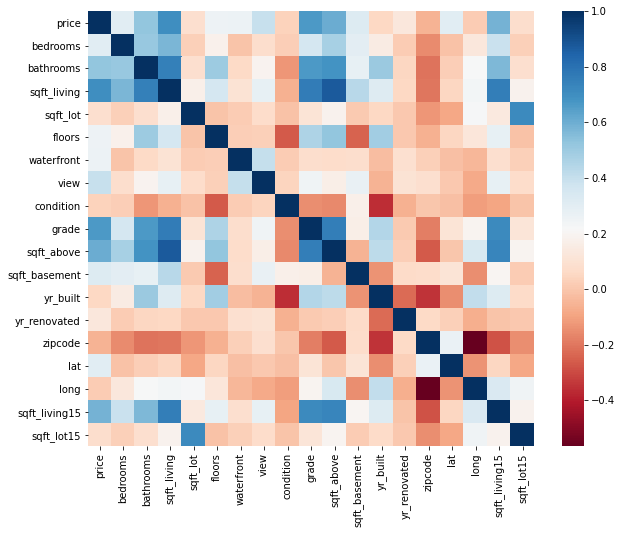

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr, cmap='RdBu', )  # Heatmap des corrélations
plt.show()

## Regression 

#### Split données clean et à prédire

In [0]:
df_sales_clean = df_sales.dropna()  # DF sans NaN pour fit le model

df_sales_NaN = df_sales[df_sales['price'].isna()]   # Model avec les prix manquants pour la prédiction.

In [8]:
df_sales_clean.shape

(21609, 21)

In [9]:
df_sales_NaN.shape

(4, 21)

### Train test split


#### Avec toutes les variables

In [0]:
colNames = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df_sales_clean[colNames]
y = df_sales_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)

LRmodel = LinearRegression().fit(X_train, y_train)

In [11]:
  print('Train score = {}'.format(LRmodel.score(X_train, y_train)))
  print('Test score = {}'.format(LRmodel.score(X_test, y_test)))

Train score = 0.7012834392036323
Test score = 0.6945757530852764


#### Méthode par itération





In [0]:
def Iterative_LinearRegression_modeling(data, target, mods=False, screening=False):

  '''
  Cette fonction effectue une modélisation de la meilleure régression linéaire
  en fonction des variables du dataset et revoi le model qui obtien les meilleurs
  scores. 
  '''

  if mods:  # Import de module si nécessaire
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

  # Sélection des colonnes qui ne sont pas de type 'object'
  obj = data.columns[data.dtypes.values == np.dtype("object")]
  colNames = [x for x in data.columns if x not in obj]

  # Création d'un dictionnaire avec les variables les plus corrélées à la target
  df_corr = data[colNames].corr()
  dictCorr = dict(df_corr[target])
  del dictCorr[target]

  dictCorr = sorted(dictCorr.items(), key = lambda x : x[1])
  dictCorr.reverse()

  # Variables pour boucle
  cols = []
  train_score_max = 0
  test_score_max = 0
  Xcols = []

  # Début de la boucle de modélisation en partant de la plus forte corrélation
  for x, r in dictCorr:
    cols.append(x)    # Ajout d'une nouvelle variable au model
    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                        train_size = 0.75)

    LRmodel = LinearRegression().fit(X_train, y_train)
    
    train_score = LRmodel.score(X_train, y_train)
    test_score = LRmodel.score(X_test, y_test)

    if test_score > test_score_max:   # Si la nouvelle variable augmente le score, 
      test_score_max = test_score     # on met à jour les variables max
      train_score_max = train_score
      Xcolumns = cols
    else:
      cols.remove(x)                  # Sinon on le retire du modèle.
    

  # Print du mini compte rendu
  if screening:
    if len(Xcolumns) > 1:
      print('Best scores obtained with {} variables :'.format(len(Xcolumns)))
    else:
      print('Best scores obtained with {} variable :'.format(len(Xcolumns)))
    
    for col in Xcolumns:
      print("   ",col)

    print('\nTrain score =', train_score_max)
    print('Test score =', test_score_max)

  # Fit un nouveau model avec les meilleures variables
  Xmax = data[Xcolumns]
  X_train, X_test, y_train, y_test = train_test_split(Xmax, y, random_state=42, 
                                                      train_size = 0.75)
  
  LRmodelMax = LinearRegression().fit(X_train, y_train)

  # Retourne le meilleur model.
  return LRmodelMax, Xcolumns

In [0]:
LRmodel, Xcols = Iterative_LinearRegression_modeling(data = df_sales_clean, target='price', mods=True, screening=False)

## Prédiction

In [14]:
X_NaN = df_sales_NaN[Xcols]

df_sales_NaN['price'] = LRmodel.predict(X_NaN)

df_sales_clean['flag'] = 'True'
df_sales_NaN['flag'] = 'Predict'

df_sales_final = pd.concat([df_sales_clean, df_sales_NaN])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

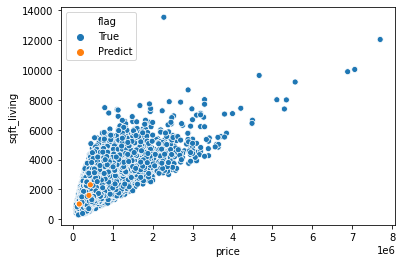

In [15]:
sns.scatterplot(x = 'price', y = 'sqft_living', data = df_sales_final, hue = 'flag')
plt.show()